In [2]:
import os
# from numba import jit
# from tqdm import tqdm

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from matplotlib import cm

# from my_utilities.data import get_data
# from my_utilities.ramachandran import get_ramachandran, plot_ramachandran
# from my_utilities.svd import SVD_representation
# from my_utilities.density.vec import get_trivial_vec_density, get_linear_interpolator
# from my_utilities.metrics import log_likelihood

from my_utilities.constants import aminoacid_name_from_1l

In [3]:
!ls my_cache

aa_ramachandran_data.pkl  likelihoods_gaussian.pkl  likelihoods_SVD.pkl


In [4]:
lld_gauss = pd.read_pickle("./my_cache/likelihoods_gaussian.pkl")
lld_svd   = pd.read_pickle("./my_cache/likelihoods_SVD.pkl")
lld = pd.concat([lld_gauss, lld_svd])

## SVD Demo

In [9]:
def plot_likelihoods(aa, pp, interp, D_MIN=2, X_MAX=1060, plot_gmm=True, saveto=None):
    
    llds = lld_svd[(lld_svd["aminoacid"] == aa) &
               (lld_svd["preproline"] == pp) &
               (lld_svd["interpolation method"] == interp)
               ].sort_values("parameters", ascending=False)
    
    svdg = llds[(llds["representation"] == "SVD") &     
                (llds["num of SVs"] >= D_MIN)] \
                  [["full matrix size",
                    "parameters",
                    "norm_log_likelihood"]] \
                    .groupby("full matrix size")
    
    rawd = llds[llds["representation"] == "raw matrix"]\
                  [["full matrix size",
                    "parameters",
                    "norm_log_likelihood"]]
    
    plt.figure(figsize=(4,4))
    
    for g in svdg:
        n  = g[0]
        dd = g[1][["parameters","norm_log_likelihood"]].values
        plt.plot(dd[:,0], dd[:,1], marker="o", label=f"n:{n}")

    for i, row in rawd.iterrows():
        if row["parameters"] < X_MAX:
            plt.scatter(row["parameters"], row["norm_log_likelihood"],
                        label=str(row["full matrix size"]), marker="x", s=100)
    
    if plot_gmm:
        gaussdata = lld[(lld["representation"] == "gaussians") &
                (lld["aminoacid"] == aa) &
                (lld["preproline"] == pp)] \
                [["parameters",
                  "norm_log_likelihood"]].sort_values("parameters").to_numpy()

    #     print(gaussdata.shape)
        plt.plot(gaussdata[1:,0], gaussdata[1:,1], label="GMM")
    

    pp_text = "preproline" if pp else "nonpreproline"
    
    plt.xlim(0,X_MAX)
    plt.xlabel(r"liczba parametrów")
    plt.ylabel(r"$\log(L) / n$")#(r"$\frac{log(L)}{n}$")
#     plt.title(f"{aminoacid_name_from_1l(aa)}, {pp_text}, {interp}")
    print(f"{aminoacid_name_from_1l(aa)}, {pp_text}, {interp}")
    plt.legend()
    
    if saveto is not None:
        plt.savefig(saveto, bbox_inches='tight', pad_inches=0.001)
    else:
        plt.show()

In [6]:
plot_dir="./thesis_plots"

Leucine, preproline, trivial
Alanine, preproline, trivial
Glycine, preproline, trivial
Valine, preproline, trivial
Glutamic acid, preproline, trivial
Aspartic acid, preproline, trivial


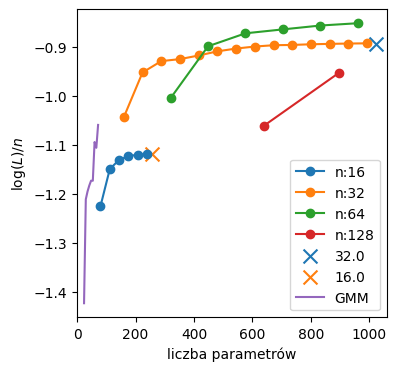

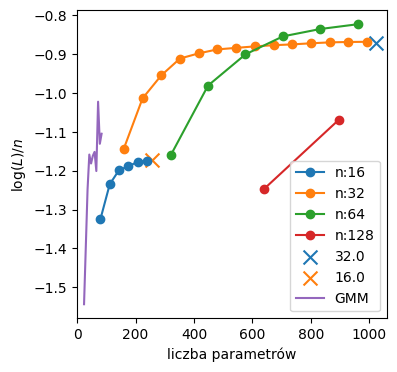

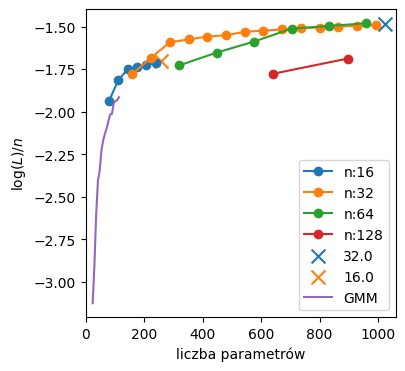

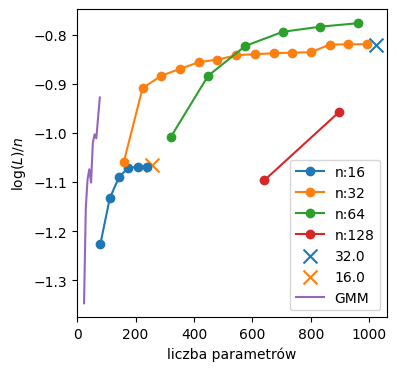

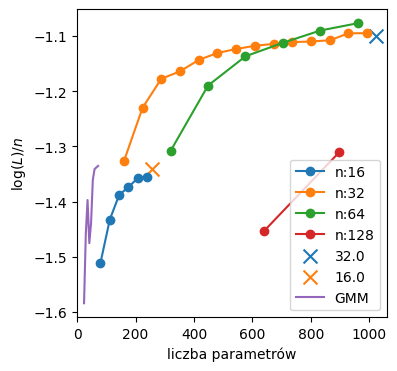

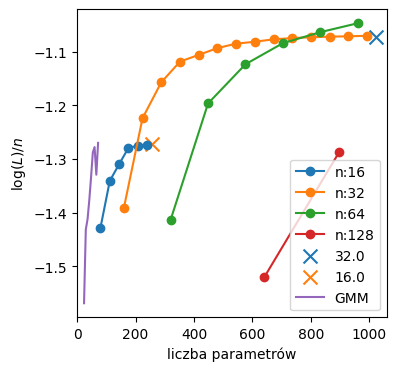

In [11]:
pp = True
pp_text = "pp" if pp else "np"
interp ="trivial"

for aa in ["L","A","G","V","E","D"]:
    plot_likelihoods(aa, pp, interp, D_MIN=2, saveto=f"{plot_dir}/log-likelihoods_rama_{aa}_{pp_text}.png")

Leucine, preproline, trivial


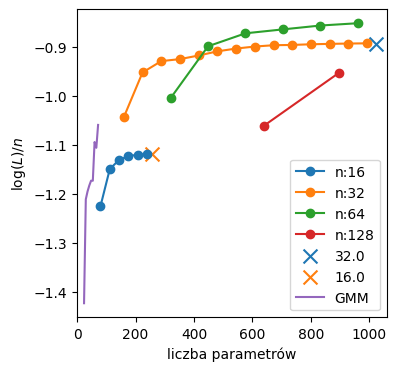

Alanine, preproline, trivial


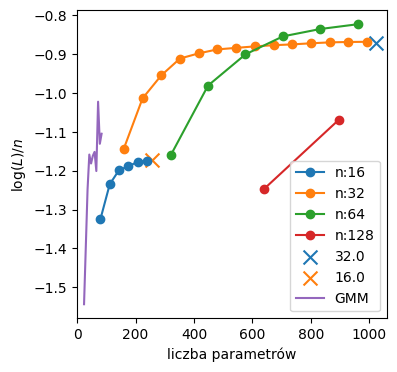

Glycine, preproline, trivial


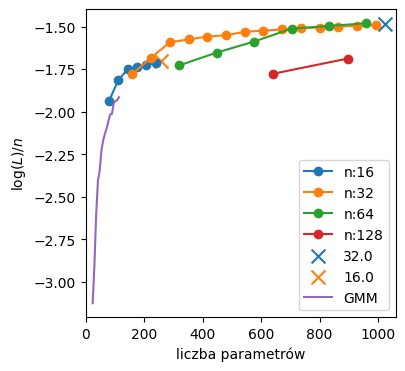

Valine, preproline, trivial


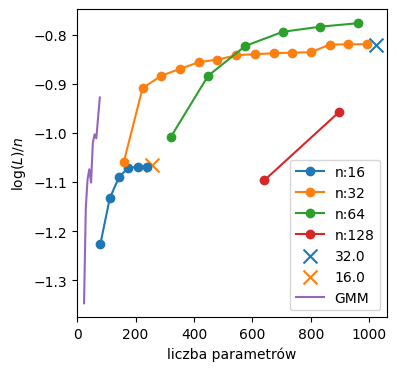

Glutamic acid, preproline, trivial


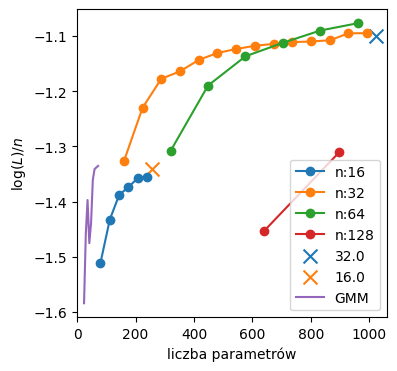

Aspartic acid, preproline, trivial


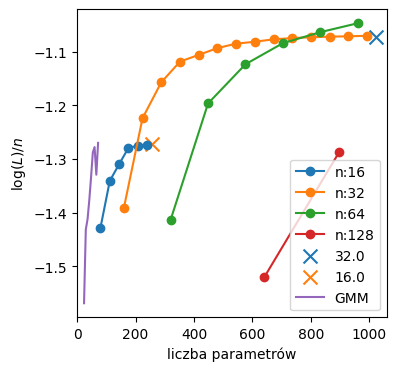

In [11]:
pp = True
interp ="trivial"

for aa in ["L","A","G","V","E","D"]:
    plot_likelihoods(aa, pp, interp, D_MIN=2)

In [9]:
plot_likelihoods(aa, pp, interp, D_MIN=2, plot_gmm = False)

In [15]:
plt.plot([1,2,3,4])

## SVD Demo

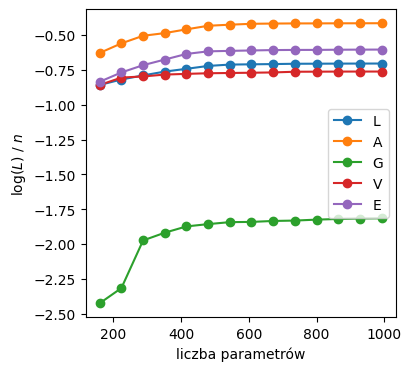

In [101]:
SVD_N = 32
D_MIN = 2
INTERP_METHOD = "trivial"

plt.figure(figsize=(4,4))


for aa in ["L","A","G","V","E"]:
# for aa in ["L","A","V","E"]:
#     for pp in [True, False]:
    pp = False
    pptext = "pp" if pp else "npp"
    plot_data = lld_svd[
                (lld_svd["aminoacid"] == aa) &
                (lld_svd["preproline"] == pp) &
                (lld_svd["num of SVs"] >= D_MIN) &
                (lld_svd["full matrix size"] == SVD_N) &
                (lld_svd["interpolation method"] == INTERP_METHOD)
                ].sort_values("parameters", ascending=True) \
                [["parameters", "norm_log_likelihood"]]
        
#     plt.plot(plot_data["parameters"], plot_data["norm_log_likelihood"], label=f"{aa}, {pptext}")
    plt.plot(plot_data["parameters"], plot_data["norm_log_likelihood"], marker="o", label=f"{aa}")
        
# plt.xlim(0,lld_gauss["parameters"].max())
# plt.ylim0,400()
plt.xlabel(r"liczba parametrów")
plt.ylabel(r"$\frac{log(L)}{n}$")
plt.ylabel(r"$\log(L) \ / \ n$")
plt.legend()
plt.show()

## Basic Gaussians Demo

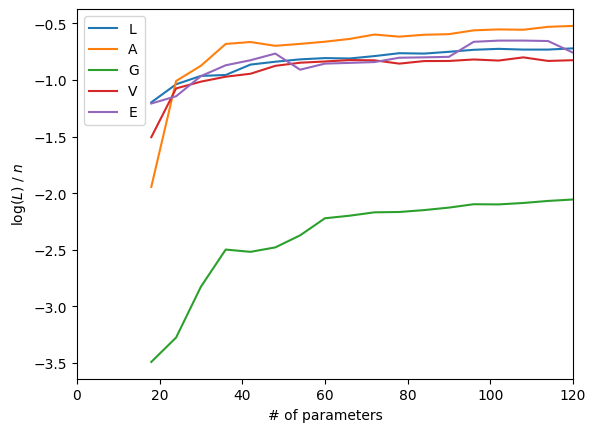

In [100]:
for aa in ["L","A","G","V","E"]:
#     for pp in [True, False]:
    pp = False
    pptext = "pp" if pp else "npp"
    plot_data = lld_gauss[
                (lld_gauss["aminoacid"] == aa) &
                (lld_gauss["preproline"] == pp)
                ].sort_values("parameters", ascending=True) \
                [["parameters", "norm_log_likelihood"]]
#     plt.plot(plot_data["parameters"], plot_data["norm_log_likelihood"], label=f"{aa}, {pptext}")
    plt.plot(plot_data["parameters"], plot_data["norm_log_likelihood"], label=f"{aa}")
        
plt.xlim(0,lld_gauss["parameters"].max())
plt.xlabel(r"# of parameters")
plt.ylabel(r"$\frac{log(L)}{n}$")
plt.ylabel(r"$\log(L) \ / \ n$")
# plt.title("GMM representations")
plt.legend()
plt.show()

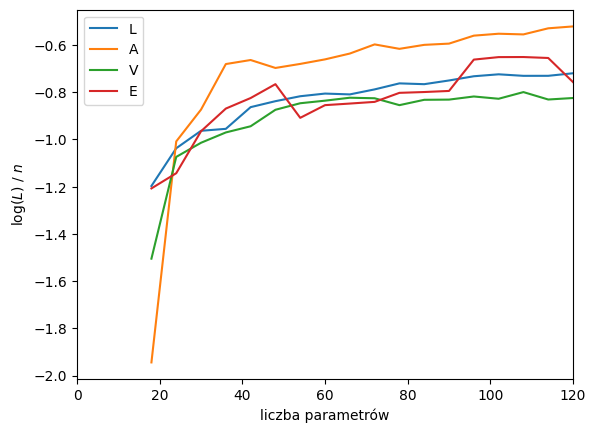

In [97]:
for aa in ["L","A","V","E"]:
#     for pp in [True, False]:
    pp = False
    pptext = "pp" if pp else "npp"
    plot_data = lld_gauss[
                (lld_gauss["aminoacid"] == aa) &
                (lld_gauss["preproline"] == pp)
                ].sort_values("parameters", ascending=True) \
                [["parameters", "norm_log_likelihood"]]
#     plt.plot(plot_data["parameters"], plot_data["norm_log_likelihood"], label=f"{aa}, {pptext}")
    plt.plot(plot_data["parameters"], plot_data["norm_log_likelihood"], label=f"{aa}")
        
plt.xlim(0,lld_gauss["parameters"].max())
plt.xlabel(r"liczba parametrów")
plt.ylabel(r"$\frac{log(L)}{n}$")
plt.ylabel(r"$\log(L) \ / \ n$")
# plt.title("GMM representations")
plt.legend()
plt.show()

In [18]:
lld

,aminoacid,preproline,representation,num_of_gaussians,log_likelihood,norm_log_likelihood,parameters,data points,interpolation method,full matrix size,num of SVs
0,R,True,gaussians,6.0,-7693.009192,-1.456733,36,5281,NaN,NaN,NaN
1,P,False,gaussians,3.0,-55876.150712,-0.510714,18,109408,NaN,NaN,NaN
2,C,True,gaussians,8.0,-2459.099156,-1.451652,48,1694,NaN,NaN,NaN
3,Q,True,gaussians,8.0,-5546.456659,-1.413830,48,3923,NaN,NaN,NaN
4,N,True,gaussians,8.0,-9813.964205,-1.576034,48,6227,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3195,W,False,SVD,NaN,-129632.821002,-3.675754,128,35267,linear,128.0,0.0
3196,W,False,raw matrix,NaN,-33072.010793,-0.937761,16384,35267,linear,128.0,NaN
3197,W,False,SVD,NaN,-95640.044060,-2.711885,384,35267,linear,128.0,1.0
3198,W,False,SVD,NaN,-41474.631392,-1.176018,896,35267,linear,128.0,3.0
